# Testing

* **Products used:** 


### Background 

### Description


***

## Getting started


### Load packages
Load key Python packages and any supporting functions for the analysis.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats
import pandas as pd
import geopandas as gpd
import xarray as xr
from sklearn.metrics import mean_absolute_error
from scipy.stats import gaussian_kde

### Analysis parameters


In [2]:
path = 'results/ndvi_ls8_ls7_polys.csv' 

In [4]:
# gdf = gpd.read_file('results/ndvi_ls8_ls7_polys.geojson')
# gdf.explore()

In [4]:
df = pd.read_csv(path).drop('Unnamed: 0', axis=1)

### 1:1 plots

In [5]:
x=df['NDVI_ls8'].values
y=df['NDVI_ls7'].values

slope, intercept, r, p, sd = stats.linregress(x, y)
mae = mean_absolute_error(x,y)

In [6]:
# Calculate the point density
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)

linear eq: NDVI_LS7 = 0.988*NDVI_LS8 + -0.015
MAE:  0.038




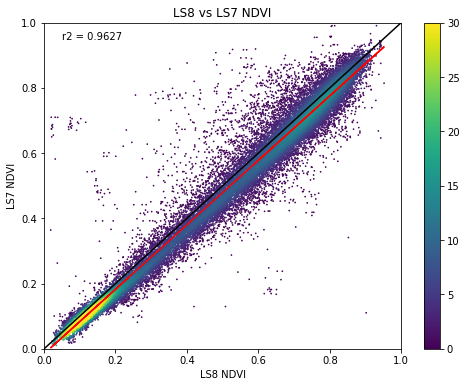

In [7]:
print(f'linear eq: NDVI_LS7 = {slope:.3f}*NDVI_LS8 + {intercept:.3f}')
print("MAE: ", round(mae, 3))
print('\n')

fig, ax = plt.subplots(1,1, sharey=True, figsize=(8,6))
plt.scatter(x, y, c=z, s=0.5)
plt.plot(x, intercept + slope * x, '-', c='red')
plt.clim(0,30)
plt.colorbar()
plt.text(0.05,0.95,"r2 = "+str(round(r**2,4)))
ax.set_xlim(0, 1.0)
ax.set_ylim(0, 1.0)
ax.plot([0, 1], [0, 1], 'k-')
ax.set_xlabel('LS8 NDVI')
ax.set_ylabel('LS7 NDVI')
ax.set_title('LS8 vs LS7 NDVI');

## Harmonization using DE Africa derived coefficients

if `y = ax + b`, and we want `y==x`, then

`y-new = (y - b)/a`

In [8]:
y_dea = (y - intercept)/slope

In [9]:
#redo the inear equation and 
s, i, r, p, sd, = stats.linregress(x, y_dea)
mae = mean_absolute_error(x,y_dea)

In [10]:
# Calculate the point density
xy_dea = np.vstack([x,y_dea])
z_dea = gaussian_kde(xy_dea)(xy_dea)

MAE:  0.032




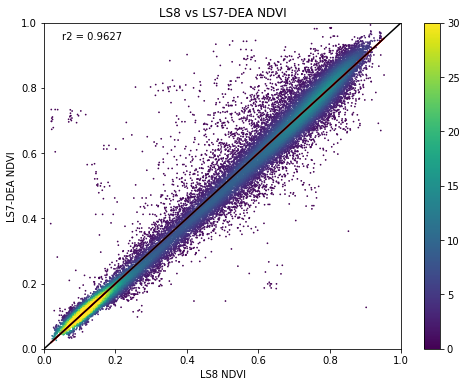

In [11]:
print("MAE: ", round(mae, 3))
print('\n')

fig, ax = plt.subplots(1,1, sharey=True, figsize=(8,6))
plt.scatter(x, y_dea, c=z, s=0.5)
plt.plot(x, i + s * x, '-', c='red')
plt.clim(0,30)
plt.colorbar()
plt.text(0.05,0.95,"r2 = "+str(round(r**2,4)))
ax.set_xlim(0, 1.0)
ax.set_ylim(0, 1.0)
ax.plot([0, 1], [0, 1], 'k-')
ax.set_xlabel('LS8 NDVI')
ax.set_ylabel('LS7-DEA NDVI')
ax.set_title('LS8 vs LS7-DEA NDVI');